# Load in Packages

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as col
from matplotlib.colors import PowerNorm
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter
from skimage.draw import disk
from scipy.optimize import curve_fit
from scipy import signal
from scipy.fft import fft, fftshift
#from lmfit import Parameters, minimize, report_fit
from obspy.imaging.cm import viridis_white
import cmocean
import xarray as xr
from math import nan

from Loader import DataLoader
from Main import main
from Manager import DataHandler, FigureHandler, PlotHandler, ValueHandler, SliderManager, EventHandler, CheckButtonManager, ClickButtonManager
import mpes
from mpes import cmap_LTL, cmap_LTL2
%load_ext autoreload
%autoreload 2

# Specify Data to Load

In [2]:
filename, offsets = 'Scan788_Ppol3_delay_binned.h5', [0.3, 0]
data_path = 'R:\Lawson\Data\metis'

%matplotlib inline
cmap_plot = cmap_LTL

### Load the data and axes information


In [3]:
data_loader = DataLoader(data_path + '//' + filename, offsets)

I = data_loader.load()
I = I.loc[{"delay":slice(-350,1100)}]
I = I/np.max(I)

I_diff = I - I.loc[{"delay":slice(-400,-100)}].mean(dim="delay")
I_diff = I_diff/np.max(I_diff)

I_res = I
I_diff = I_diff

a, b = 3.508, 4.763 # CrSBr values
X, Y = np.pi/a, n

The data shape is: (120, 120, 250, 65)
"R:\Lawson\Data\metis//Scan788_Ppol3_delay_binned.h5" has been loaded! Happy Analysis...


NameError: name 'n' is not defined

### Plot Momentum Maps at Constant Energy

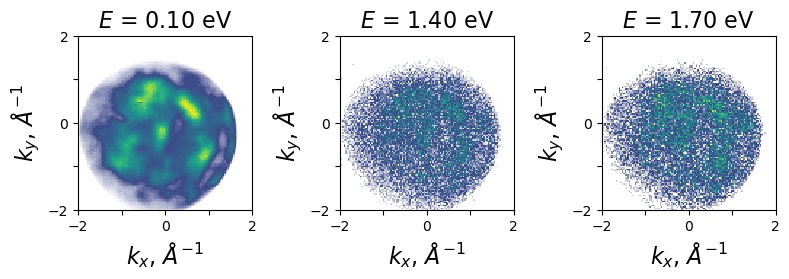

In [ ]:
E, E_int = [.1, 1.4, 1.7], 0.1

delays, delay_int = 500, 1000

fig, ax, im = mpes.plot_momentum_maps(
    I_res, E=E, E_int=0.2, delays=delays, delay_int=delay_int,
    cmap=cmap_LTL, scale=[0, 1],
    fontsize=16, figsize=(8, 3), colorbar=False, panel_labels = False
)

#mpes.overlay_bz('rectangular', 3.508, 4.763, ax[0], 'black')

mpes.save_figure(fig, name = f'test', image_format = 'pdf')

### Plot Delay Traces

Text(0.5, 1.0, 'k_int=4.0')

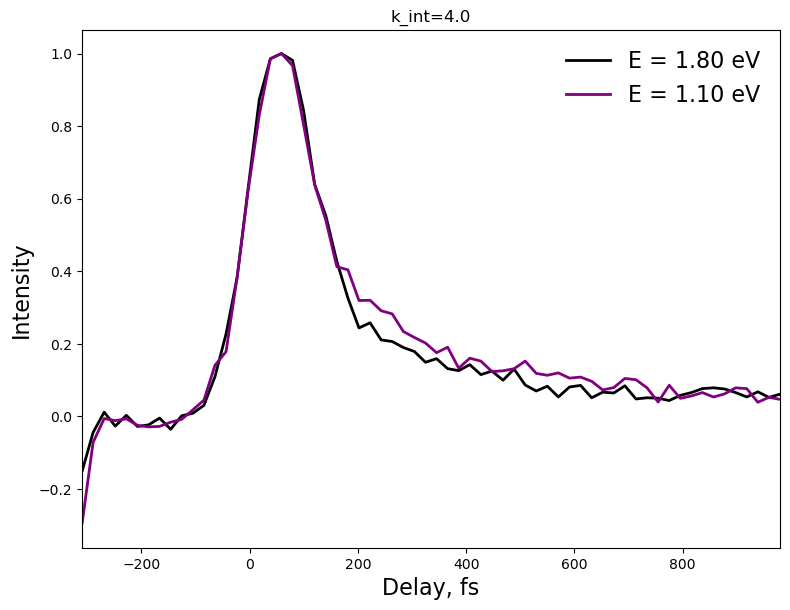

In [ ]:
# Plot time traces
E, E_int = [1.8, 1.1], .12 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
norm_trace = True
subtract_neg = True
neg_delays = [-300, -50]

fig, axs = plt.subplots()
fig.set_size_inches(8, 6, forward=False)
#axs = axs.flatten()

mpes.plot_time_traces(
    I, E, E_int, (kx, ky), (kx_int, ky_int),
    norm_trace, subtract_neg, neg_delays,
    fig = fig, ax = axs,
    colors = ['black', 'purple'],
    fontsize=16
)

axs.set_title(f"k_int={kx_int:.1f}")

### Plot Waterfall Trace

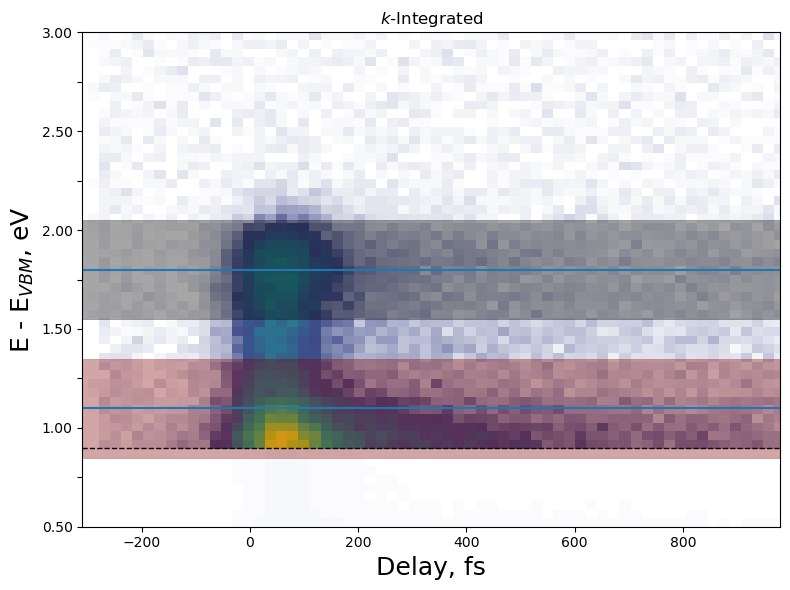

In [ ]:
# Plot waterfall
fig, ax = plt.subplots()
fig.set_size_inches(8, 6, forward=False)

(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration

mpes.plot_waterfall(
    I_diff, kx, kx_int, ky, ky_int,
    fig = fig, ax = ax,
    cmap=cmap_LTL, scale=[0,1], energy_limits=[.5,3]
)

colors = ['black', 'maroon']

for i in np.arange(len(E)):

    rect3 = (Rectangle((-500, E[i]-E_int/2), 2000, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.35))
    ax.add_patch(rect3) #Add rectangle to plot

ax.axhline(E[0])    
ax.axhline(E[1])    

### Plot Overview: MM, Delay Traces, k-cut, and Waterfall Panel

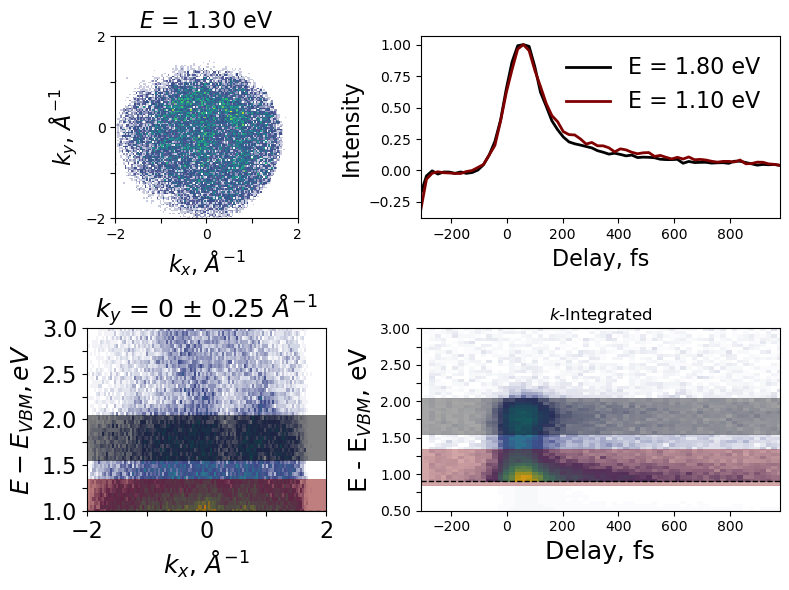

In [ ]:
fig, axs = plt.subplots(2, 2, gridspec_kw={'width_ratios': [1, 1.5], 'height_ratios':[1, 1]})
fig.set_size_inches(8, 6, forward=False)
axs = axs.flatten()

# Plot momentum map
mpes.plot_momentum_maps(
    I_res, E=1.3, E_int=0.2, delays=500, delay_int=1000,
    fig = fig, ax = axs[0],
    cmap=cmap_plot,
    panel_labels=False, fontsize=16,
    nrows=2, figsize=(8, 6)
)

# Plot time traces
E, E_int = [1.8, 1.1], .5 # Energies for Plotting Time Traces ; 1st Energy for MM
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
norm_trace = True
subtract_neg = True
neg_delays = [-300, -50]

mpes.plot_time_traces(
    I, E, E_int, (kx, ky), (kx_int, ky_int),
    norm_trace, subtract_neg, neg_delays,
    fig = fig, ax = axs[1],
    colors = ['black', 'maroon'],
    fontsize=16
)

# Plot kx-E frame
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 0.5) # Central (kx, ky) point and k-integration
mpes.plot_kx_frame(
    I_res, ky, ky_int, delays=[500], delay_int=1000,
    E_enhance = 1,
    subtract_neg=subtract_neg, neg_delays=neg_delays,
    fig = fig, ax = axs[2],
    cmap = cmap_plot, scale=[0,1], energy_limits=[1,3]
)

# # Plot ky-E frame
# (kx, ky), (kx_int, ky_int) = (0, 0), (0.5, 0.5) # Central (kx, ky) point and k-integration
# mpes.plot_ky_frame(
#     I_res, ky, ky_int, delays=[500], delay_int=1000,
#     subtract_neg=subtract_neg, neg_delays=neg_delays,
#     fig = fig, ax = axs[2],
#     cmap = 'BuPu', scale=[0,1], energy_limits=[1,3]
# )

# Plot waterfall
(kx, ky), (kx_int, ky_int) = (0, 0), (4, 4) # Central (kx, ky) point and k-integration
mpes.plot_waterfall(
    I_diff, kx, kx_int, ky, ky_int,
    fig = fig, ax = axs[3],
    cmap=cmap_LTL, scale=[0,1], energy_limits=[.5,3]
)

rect = (Rectangle((kx-kx_int/2, ky-ky_int/2), kx_int, ky_int, linewidth=.5,\
                         edgecolor='fuchsia', facecolor='fuchsia', alpha = 0.3))
if kx_int < 4:
    axs[0].add_patch(rect) #Add rectangle to plot
    
colors = ['black', 'maroon']

for i in np.arange(len(E)):
    rect2 = (Rectangle((kx-kx_int/2, E[i]-E_int/2), kx_int, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.5))
    rect3 = (Rectangle((-500, E[i]-E_int/2), 2000, E_int , linewidth=.5,\
                         edgecolor=colors[i], facecolor=colors[i], alpha = 0.35))
    axs[2].add_patch(rect2) #Add rectangle to plot
    axs[3].add_patch(rect3) #Add rectangle to plot

#mpes.save_figure(fig, name = f'test', image_format = 'pdf')
#test

### Define Energetic Zero VBM Position

E_VBM = -0.089 +- 0.017 eV


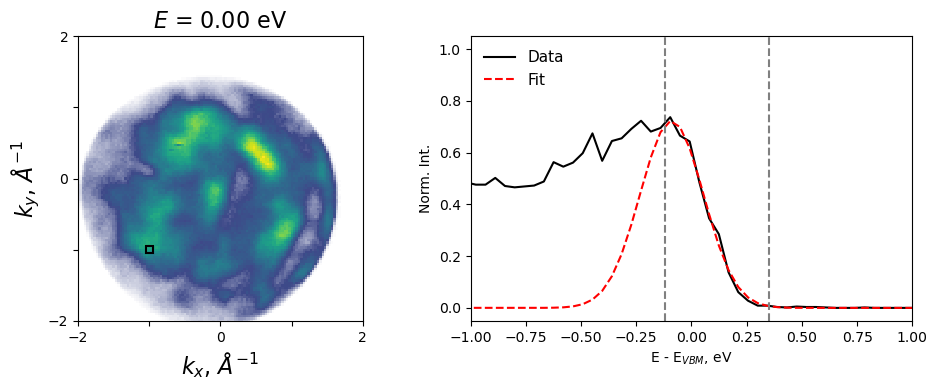

In [ ]:
#%% Define E = 0 wrt VBM

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1, 1], 'height_ratios':[1]})
fig.set_size_inches(10, 4, forward=False)
ax = ax.flatten()

figure_file_name = 'vbm'
save_figure = False

### Plot EDCs at GAMMA vs time

(kx, ky), k_int = (-1, -1), 0.1

delay, delay_int = -300, 100

edc_gamma = mpes.get_edc(I_res, kx, ky, (k_int, k_int), delay, delay_int)
edc_gamma = edc_gamma/np.max(edc_gamma)

mpes.plot_momentum_maps(
    I_res, E=0, E_int=.1, delays=500, delay_int=1000,
    fig = fig, ax = ax[0],
    cmap=cmap_LTL, scale=[0, 1],
    fontsize=16, figsize=(8, 6), colorbar=False, panel_labels = False
)
    
energy_window = [-0.12, 0.35]
p0 = [1, .02, 0.4, 0] # Fitting params initial guess [amp, center, width, offset]

mpes.find_E0(edc_gamma, energy_window, p0, fig, ax)

# cbar_ax = fig.add_axes([.51, 0.275, 0.025, 0.5])
rect = (Rectangle((kx-k_int/2, ky-k_int/2), k_int, k_int, linewidth=1.5,\
                         edgecolor='k', facecolor='None'))
fig.axes[0].add_patch(rect)
ax[1].axvline(energy_window[0], color = 'grey', linestyle = 'dashed')
ax[1].axvline(energy_window[1], color = 'grey', linestyle = 'dashed')
#